In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# 1. 이미지 셋 불러오기

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [8]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

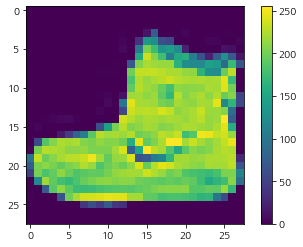

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# 2. 이미지 전처리

# 1) 4차원으로 생성
#    - 이미지 셋 3차원: 2차원 이미지가 여러 장
#    - 이미지 픽셀마다 특성(특징)을 추출하는 처리를 하기 위한 차원 하나 더 추가
# 2) 데이터를 읽어왔을 때 픽셀마다의 값의 명암 정도만 가지고 있음(0 ~ 255)
#    - 0 ~ 1 사이로 스케일링(표준화)시켜줌
#    - 방법) 255로 나누어주면 됨
# 3) 이미지 크기는 아주 다양하므로 크기를 표준화

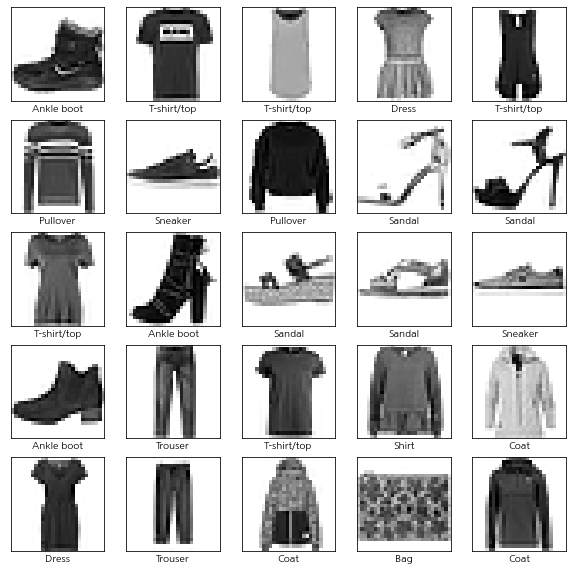

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

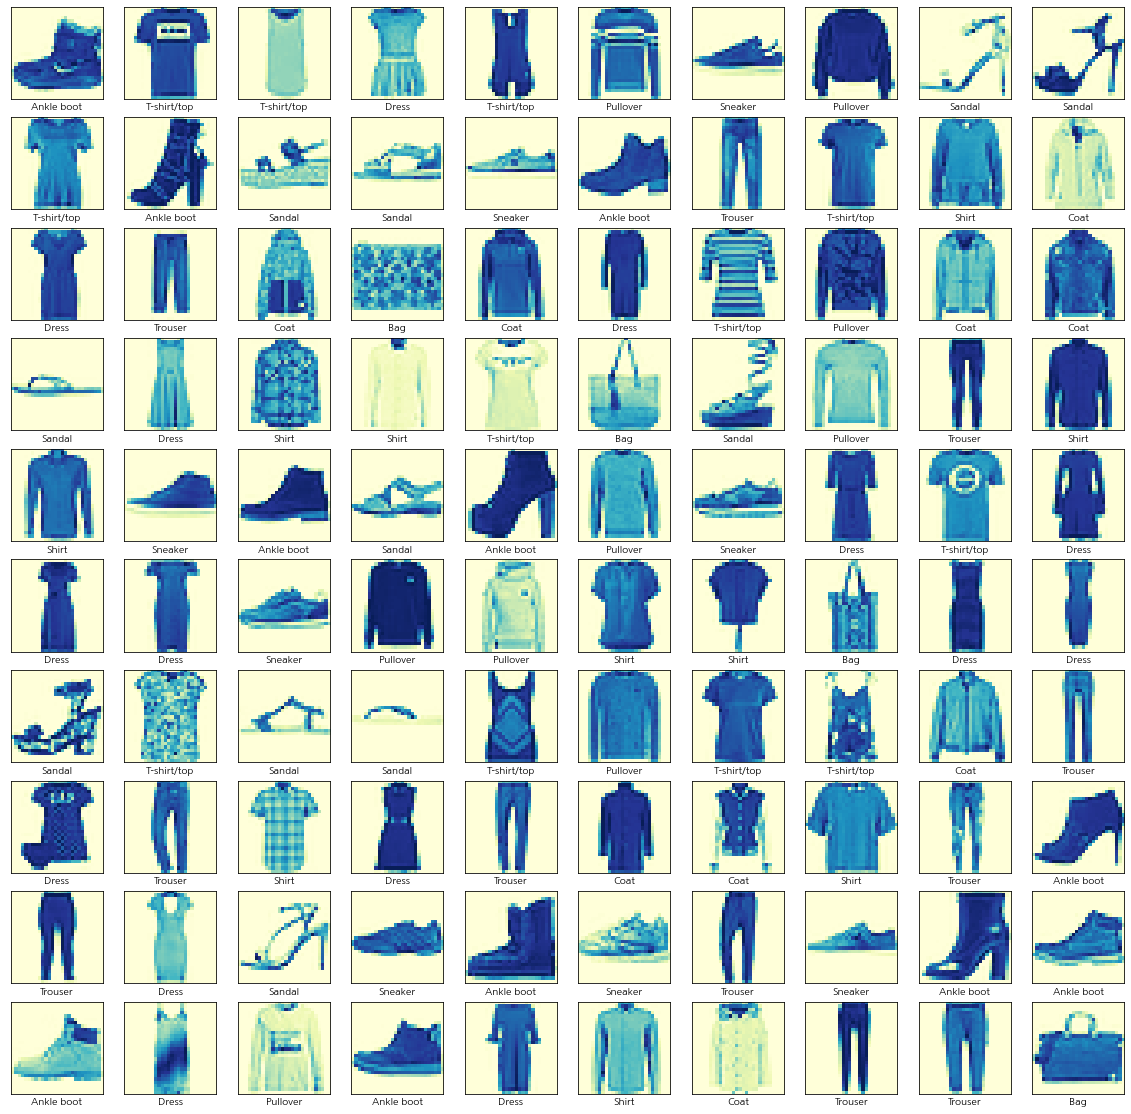

In [12]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.YlGnBu)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [14]:
train_images.shape

(60000, 28, 28, 1)

In [15]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
# 3. 특성 추출 처리

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))

In [19]:
# 4. 특성추출한 결과를 학습데이터로 넣어서 학습할 예정
#    deep modeling
#    1) 특성 추출한 이미지 데이터를 1차원으로 생성 (Flatten)
#    2) 딥러닝 심층신경망(deep MLP)
#    3) fit()

In [20]:
model.add(Flatten()) ## 입력층
model.add(Dense(64, activation='sigmoid')) ## 히든층
model.add(Dense(10, activation='softmax')) ## 출력층

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
            )

In [23]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=100)
history

Epoch 1/5
600/600 [==============================] - 17s 27ms/step - loss: 1.1828 - accuracy: 0.5718
Epoch 2/5
600/600 [==============================] - 16s 26ms/step - loss: 0.6203 - accuracy: 0.7663
Epoch 3/5
600/600 [==============================] - 18s 29ms/step - loss: 0.5265 - accuracy: 0.8034
Epoch 4/5
600/600 [==============================] - 16s 27ms/step - loss: 0.4642 - accuracy: 0.8286
Epoch 5/5
600/600 [==============================] - 17s 28ms/step - loss: 0.4237 - accuracy: 0.8435


In [24]:
# 5. 모델에 대해 평가
#    1) test 데이터를 검증 ==> overfitting 여부
#    2) 시각화로 평가

In [25]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

313/313 - 1s - loss: 0.4332 - accuracy: 0.8419 - 982ms/epoch - 3ms/step


(0.43317675590515137, 0.8418999910354614)

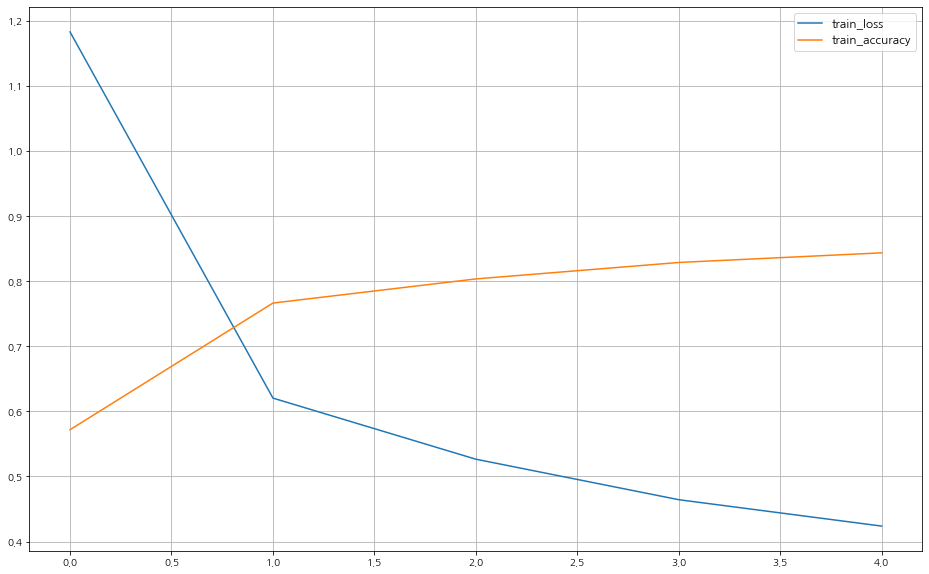

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['train_loss', 'train_accuracy'], fontsize=12)
plt.grid()
plt.show()

In [27]:
# 모델 예측

In [28]:
y_pred=model.predict(test_images)

In [29]:
y_pred[0]

array([2.5674395e-04, 6.2346902e-05, 8.9724672e-05, 1.4591683e-04,
       1.1803526e-04, 2.6222575e-02, 1.4871023e-04, 2.1280393e-01,
       3.8065005e-03, 7.5634557e-01], dtype=float32)

In [30]:
y_pred0_index=np.argmax(y_pred[0])
y_pred0_index

9

In [31]:
test_labels[0]

9